## 분류분석 개요

  - **분류(Classification) 기술**: 유튜브 영상 추천, 신용카드 도용 탐지, 의료 영상 진단 등 다양한 서비스의 핵심 예측 기술임.
  - **분류 분석의 역할**: 마치 전문가처럼 데이터를 보고 "이 고객은 VIP", "이 메일은 스팸"과 같이 명확한 카테고리로 구분하는 것과 같음.
  - **학습 목표**: 데이터의 속성을 바탕으로 특정 데이터가 어떤 그룹에 속할지 예측하는 \*\*`분류 분석`\*\*의 원리를 이해하고, 파이썬 코드로 직접 구현하여 비즈니스 문제 해결 능력을 기름

## 핵심 원리 파헤치기 (Deep Dive)

### 분류 분석이란 무엇일까요?

  - **`분류 분석(Classification Analysis)`**: 주어진 데이터의 속성(독립변수)을 활용하여, 해당 데이터가 미리 정해진 어떤 **클래스(범주)** 에 속하는지를 알아내는 과정임.
  - **특징**: 정답(Label)이 있는 데이터를 학습시키는 **`지도 학습(Supervised Learning)`** 의 한 종류이며, 기준에 따라 데이터를 판별하는 **`판별 분석(Discriminant Analysis)`** 범주에 포함됨.
  - **차이점**: 정해진 클래스 없이 유사성으로 그룹을 묶는 **`군집 분석(Clustering)`** 과는 명확히 구분됨.

### 확률적 모형 vs. 판별함수 모형

분류 문제 해결 접근법은 크게 두 가지로 나뉨.

1.  **`판별함수(Discriminant Function) 모형`**: 데이터를 가장 잘 나눌 수 있는 \*\*'경계선(Decision Boundary)'\*\*을 찾는 데 집중하는 방식.
      - 예시: **`퍼셉트론`**, **`서포트 벡터 머신(SVM)`**, **`신경망`**.
2.  **`확률적(Probability) 모형`**: 새로운 데이터가 각 클래스에 속할 \*\*'확률'\*\*을 계산하여 가장 확률이 높은 클래스를 선택하는 방식.
      - **`확률적 생성(Generative) 모형`**: 각 클래스의 데이터 분포를 학습한 후, 베이즈 정리를 이용해 확률을 계산. '이런 데이터는 보통 A 클래스에서 생성된다'는 규칙을 학습.
          - 예시: **`QDA`**, **`나이브 베이즈`**.
      - **`확률적 판별(Discriminative) 모형`**: 데이터 분포를 가정하지 않고, 데이터와 클래스 간의 관계를 직접 모델링하여 확률을 계산.
          - 예시: **`로지스틱 회귀`**, **`의사결정나무`**.

| 모형                                     | 방법론 / 클래스                                                                              |
| -------------------------------------- | -------------------------------------------------------------------------------------- |
| Linear/Quadratic Discriminant Analysis | 확률적 생성(generative) 모형<br>`sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` |
| 나이브 베이지안 (Naive Bayes)                 | 확률적 생성(generative) 모형<br>`sklearn.naive_bayes.MultinomialNB`                           |
| 로지스틱 회귀 (Logistic Regression)          | 확률적 판별(discriminative) 모형<br>`sklearn.linear_model.LogisticRegression`                 |
| 의사결정나무 (Decision Tree)                 | 확률적 판별(discriminative) 모형<br>`sklearn.tree.DecisionTreeClassifier`                     |
| 퍼셉트론 (Perceptron)                      | 판별함수(discriminant function) 모형<br>`sklearn.linear_model.Perceptron`                    |
| 서포트 벡터 머신 (Support Vector Machine)     | 판별함수(discriminant function) 모형<br>`sklearn.svm.SVC`                                    |
| 신경망 (Neural Network)                   | 판별함수(discriminant function) 모형<br>`sklearn,neural_network.MLPClassifier`               |

### 확률적 모형

  - **목표**: 입력 `x`가 주어졌을 때, `y`가 클래스 `k`가 될 조건부 확률 $P(y=k|x)$를 계산하여 가장 확률이 높은 클래스를 선택함.

  $$\hat{y} = \arg\max_{k} P(y=k|x)$$

#### 1. 확률적 생성 모형 (Generative Model)

  - **베이즈 정리**를 이용해 사후 확률($P(y=k|x)$)을 간접적으로 계산함.
  
  $$P(y=k|x) = \frac{P(x|y=k)P(y=k)}{P(x)}$$
  - **QDA (이차 판별 분석)**
      - 각 클래스의 데이터(`x`)가 다변수 정규분포를 따른다고 가정하는 대표적인 생성 모형.
      - 클래스마다 데이터의 중심(기댓값)과 형태(공분산)가 다를 수 있다고 가정함.
  - **나이브 베이즈 모형 (Naive Bayes Model)**
      - 핵심 가정: 모든 특징(독립변수)들은 클래스가 주어졌을 때 서로 \*\*`조건부 독립(Conditional Independence)`\*\*이라고 '단순하게(Naive)' 가정함.
      - 장점: 이 가정 덕분에 계산이 매우 빠르고 효율적이어서, 텍스트 분류와 같이 특징(차원)이 매우 많은 경우에 효과적임.

#### 2. 확률적 판별 모형 (Discriminative Model)

  - 데이터의 분포를 추정하는 중간 단계를 생략하고, 조건부 확률 $p(y=k∣x)$ 자체를 직접 찾아내는 방식임.
  - **로지스틱 회귀 (Logistic Regression)**
      - 선형 모델의 예측 결과를 \*\*로지스틱 함수(시그모이드 함수)\*\*를 통해 0과 1 사이의 확률 값으로 변환하는 대표적인 분류 알고리즘.
  - **의사결정나무 (Decision Tree)**
      - '스무고개'처럼 데이터에 대한 질문을 연속적으로 던져 데이터를 분류하는 모델.
      - **핵심 원리**: 매 단계에서 \*\*`정보 획득량(Information Gain)`\*\*을 최대화하는 질문(분류 규칙)을 찾아 데이터를 분할함. 정보 획득량은 분할을 통해 데이터의 \*\*`불순도(Impurity)`\*\*가 얼마나 감소했는지를 나타냄.

#### 3. 판별함수 기반 모형 (Discriminant Function-Based Model)

  - 확률 계산 대신, 데이터를 나누는 **경계면(Decision Boundary)** 자체를 함수 $f(x)$로 정의함.
  - 경계면을 기준으로 $f(x)>0$ 이면 클래스 1, $f(x)<0$ 이면 클래스 0으로 분류함.

### 다중 클래스 분류: OvO vs. OvR

분류할 클래스가 3개 이상일 때, 이진 분류기를 활용하는 두 가지 주요 전략.

1.  **`OvO (One-Vs-One)`**: 가능한 모든 클래스 쌍에 대한 이진 분류기(총 K(K-1)/2개)를 만들어, 투표를 통해 가장 많이 예측된 클래스를 선택함.
2.  **`OvR (One-vs-the-Rest)`**: 각 클래스마다 "이 클래스인가, 아니면 나머지인가?"를 판별하는 이진 분류기(총 K개)를 만들어, 가장 높은 확신도를 보인 클래스를 선택함.

## 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1. QDA(이차 판별 분석)

#### 1.1. 예제 데이터 생성 및 시각화

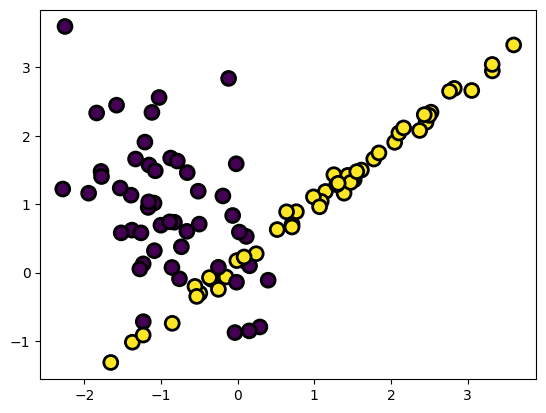

In [ ]:
# 필요한 라이브러리 import
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# 분류용 데이터 생성
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2,
                           random_state=9)

# 생성된 데이터를 산점도로 시각화
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.show()

##### 코드 해설

#### 1.2. 데이터 대칭 구조로 변환

QDA 모델의 동작을 명확히 확인하기 위해, 데이터를 원점 `(0,0)`에 대해 대칭이 되도록 인위적으로 수정합니다. 클래스 1(`y==1`)에 속하는 모든 데이터의 부호를 반전시켜 클래스 0 데이터와 대칭을 이루도록 만듭니다.

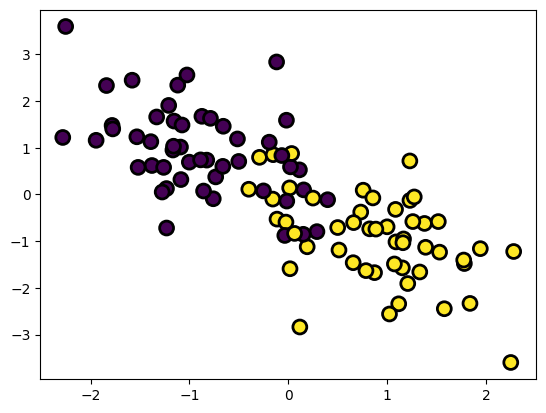

In [ ]:
# y값이 1인 데이터들의 부호를 반전시켜 대칭 구조 생성
X[y==1, :] = -(X[y==0, :])

# 대칭으로 변환된 데이터를 산점도로 다시 확인
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.show()

##### 코드 해설

#### 1.3. QDA 모델 학습 및 예측

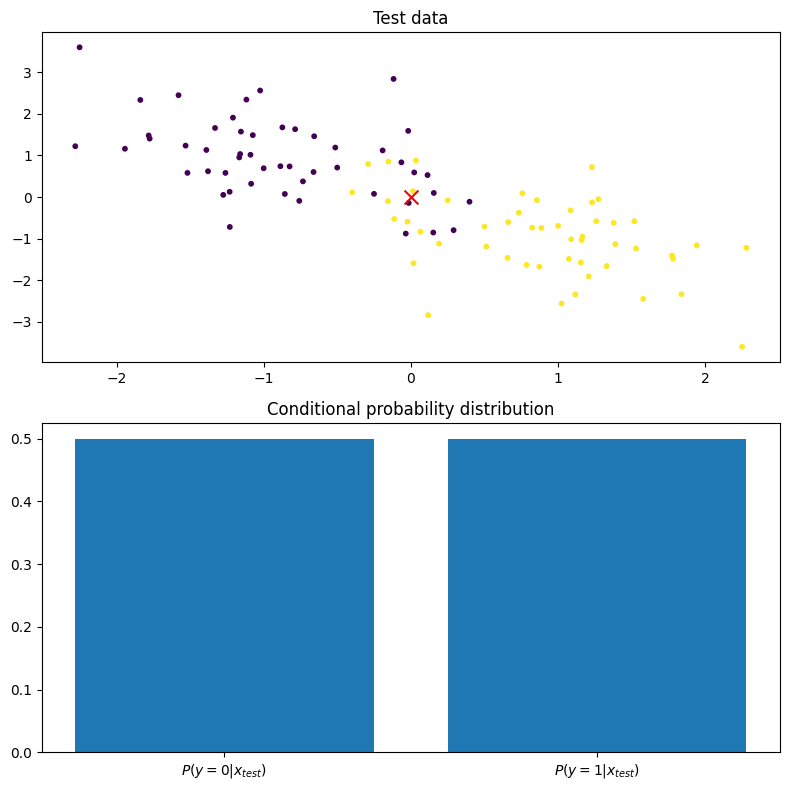

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA 모델 생성 및 학습
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

# 테스트 데이터 [0,0]에 대한 예측 확률 계산
x_test = [[0, 0]]
p = model.predict_proba(x_test)[0]

# 결과 시각화
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=10) # 훈련 데이터 시각화
plt.scatter(x_test[0][0], x_test[0][1], c='r', s=100, marker='x') # 테스트 데이터 위치 표시
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p) # 각 클래스에 속할 확률을 막대그래프로 표시
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

##### 코드 해설

#### 1.4. 테스트 데이터 위치 변경

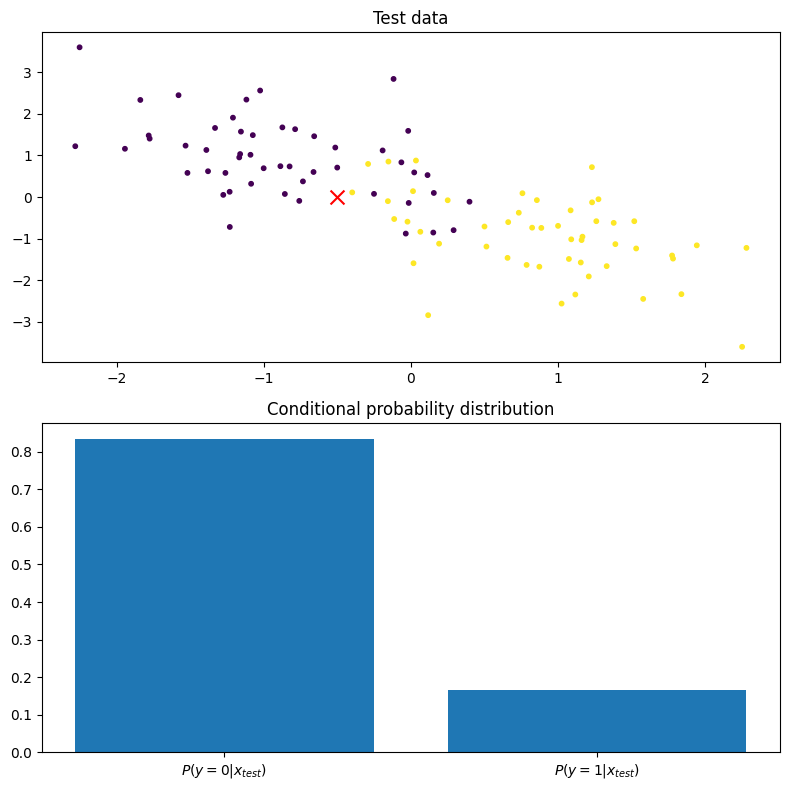

In [ ]:
# 테스트 데이터를 클래스 0 방향으로 이동
x_test = [[-0.5, 0]]
p = model.predict_proba(x_test)[0]

# 시각화 (코드는 위와 유사)
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=10)
plt.scatter(x_test[0][0], x_test[0][1], c='r', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

##### 코드 해설

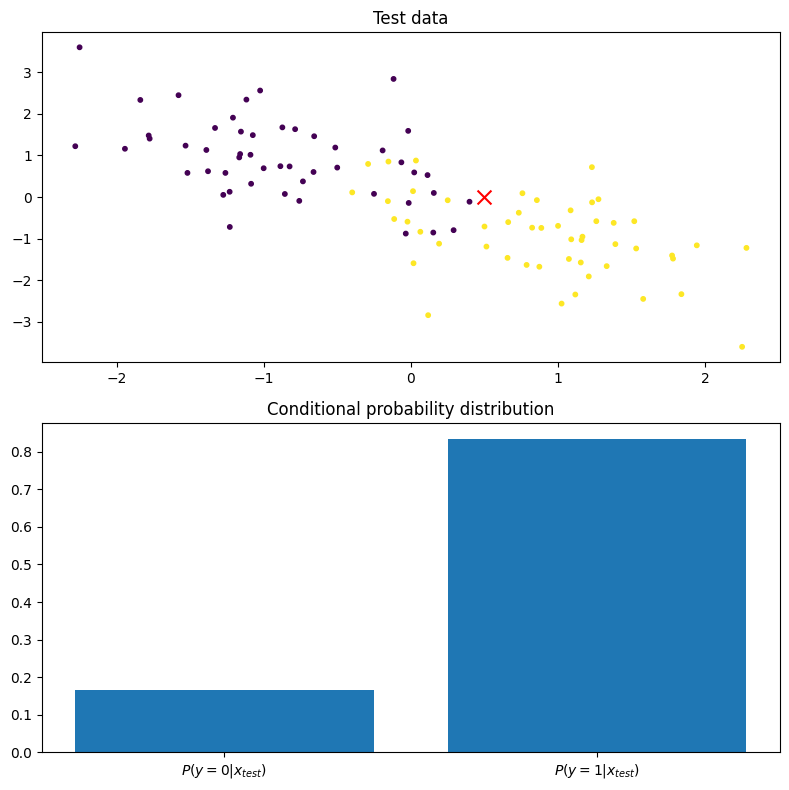

In [ ]:
# 테스트 데이터를 클래스 1 방향으로 이동
x_test = [[0.5, 0]]
p = model.predict_proba(x_test)[0]

# 시각화 (코드는 위와 유사)
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=10)
plt.scatter(x_test[0][0], x_test[0][1], c='r', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

##### 코드 해설

### 2. 나이브 베이즈(Naive Bayes)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


['setosa']


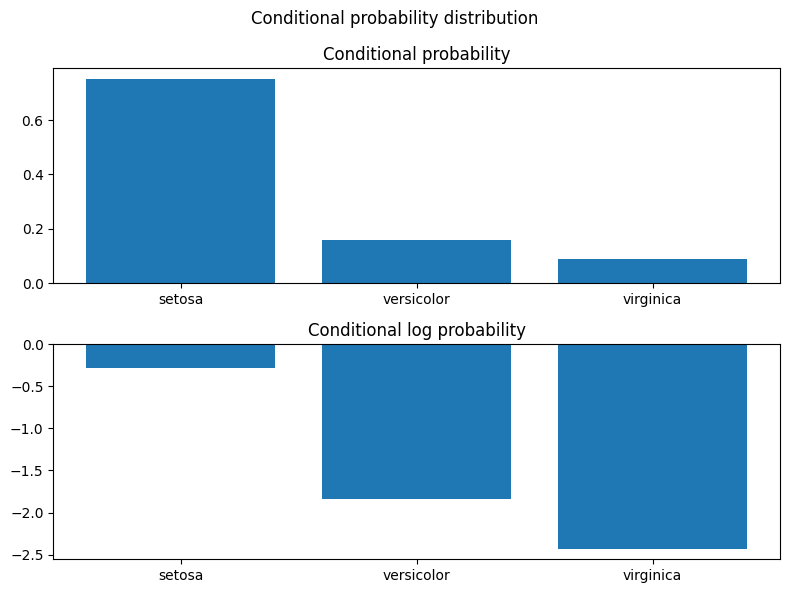

In [ ]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

# iris 데이터셋 로드
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1] # 독립변수 (꽃의 특징들)
y = iris.iloc[:, -1]  # 종속변수 (붓꽃의 품종)

# 다항분포 나이브 베이즈 모델 생성 및 학습
model = MultinomialNB()
model.fit(X, y)

# 테스트 데이터 생성 및 예측
test_X = [[5.0, 3.4, 1.2, 0.25]]
print(model.predict(test_X))

# 테스트 데이터가 각 클래스에 속할 확률 시각화
plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)
plt.title("Conditional probability")

plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)
plt.title("Conditional log probability")

plt.suptitle("Conditional probability distribution")
plt.tight_layout()
plt.show()

##### 코드 해설

### 3. 의사결정나무(Decision Tree)

#### 3.1. 의사결정나무 생성 및 시각화 (Depth=1)

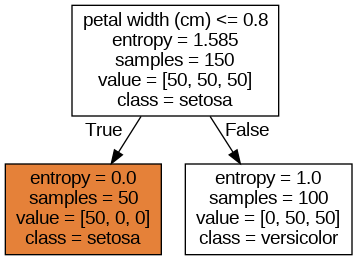

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import io
import pydot
from IPython.display import Image

# 붓꽃 데이터 로드 (특징 2개만 사용)
iris = load_iris()
X = iris.data[:, 2:] # petal length, petal width
y = iris.target
feature_names = iris.feature_names[2:]

# 의사결정나무 모델 생성 (최대 깊이=1)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
# criterion = 분할 기준 -> 기본값 gini(정보의 불순도를 기준으로 선택) / entropy (정보가 이득된걸 기준으로 선택)
dt_model.fit(X, y)

# 트리 시각화 함수 정의
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names, class_names=iris.target_names, filled=True)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

# Depth 1 트리 시각화
draw_decision_tree(dt_model, feature_names=feature_names)

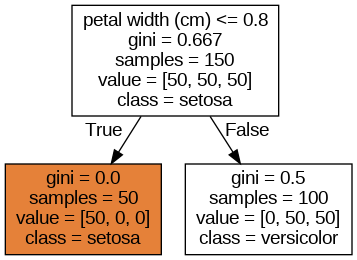

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import io
import pydot
from IPython.display import Image

# 붓꽃 데이터 로드 (특징 2개만 사용)
iris = load_iris()
X = iris.data[:, 2:] # petal length, petal width
y = iris.target
feature_names = iris.feature_names[2:]

# 의사결정나무 모델 생성 (최대 깊이=1)
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)
# criterion = 분할 기준 -> 기본값 gini(정보의 불순도를 기준으로 선택) / entropy (정보가 이득된걸 기준으로 선택)
dt_model.fit(X, y)

# 트리 시각화 함수 정의
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names, class_names=iris.target_names, filled=True)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

# Depth 1 트리 시각화
draw_decision_tree(dt_model, feature_names=feature_names)

##### 코드 해설

#### 3.2. 결정 경계 시각화 (Depth=1)

/tmp/ipython-input-2384476876.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


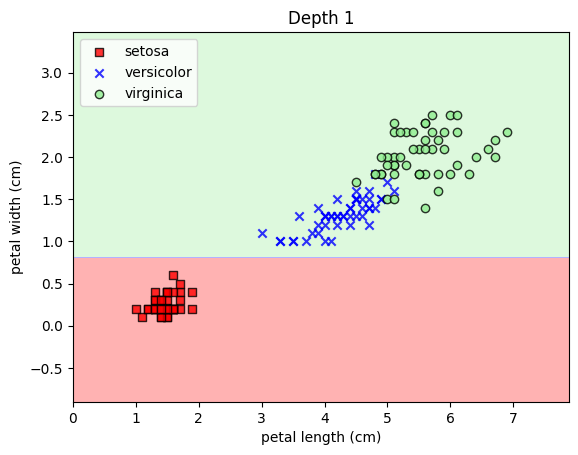

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02, feature_names=None, class_names=None):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.colors.ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=class_names[idx] if class_names is not None else cl,
                    edgecolor='black')

    if feature_names:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
    plt.legend(loc='upper left')
    plt.title("Depth 1")


plot_decision_regions(X, y, dt_model, feature_names=feature_names, class_names=iris.target_names)
plt.show()

##### 코드 해설

#### 3.3. 의사결정나무 깊이 확장 (Depth=5)

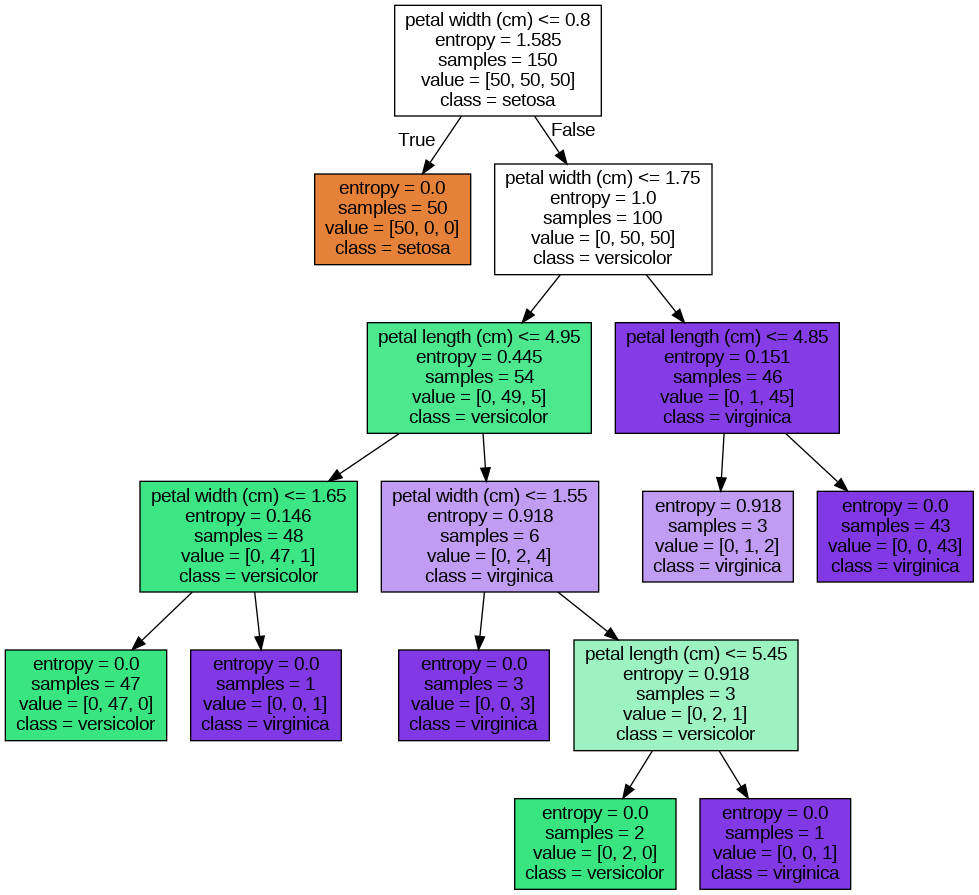

In [ ]:
# 최대 깊이를 5로 설정하여 모델 재생성 및 학습
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X, y)

# Depth 5 트리 시각화
draw_decision_tree(dt_model5, feature_names=feature_names)

##### 코드 해설

/tmp/ipython-input-2384476876.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


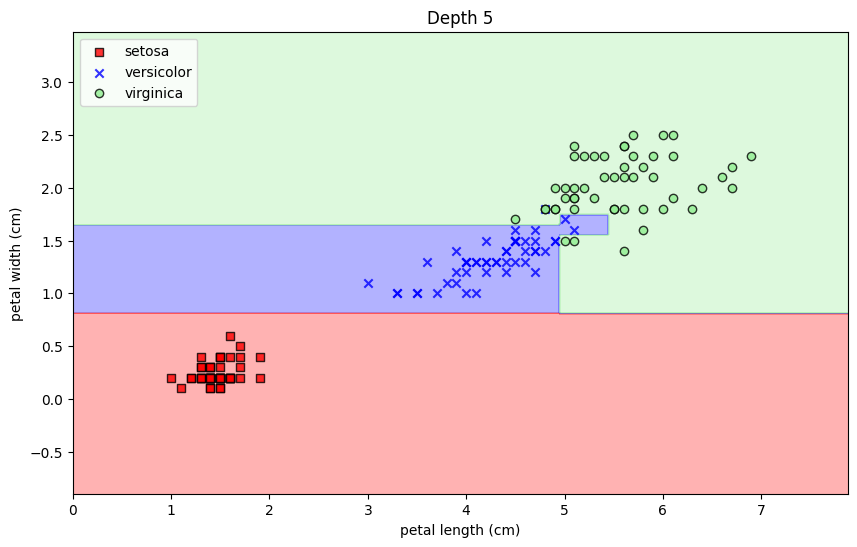

In [ ]:
# Depth 5 결정 경계 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, dt_model5, feature_names=feature_names, class_names=iris.target_names)
plt.title("Depth 5")
plt.show()

##### 코드 해설

### 4. 다중 클래스 분류 전략 (OvO vs OvR)

| 항목    | OvO (One-vs-One)        | OvR (One-vs-Rest) |
| ----- | ----------------------- | ----------------- |
| 분류기 수 | $\binom{K}{2}$          | $K$               |
| 비교 방식 | 클래스 쌍끼리 비교              | 특정 클래스 vs 나머지     |
| 투표 방식 | 다수결 투표                  | 최대 점수 선택          |
| 계산량   | 클래스 수 적을 때 괜찮음, 많을 땐 급증 | 비교적 효율적           |
| 출력    | 쌍별 점수                   | 클래스별 점수           |


#### 4.1. OvO (One-Vs-One)

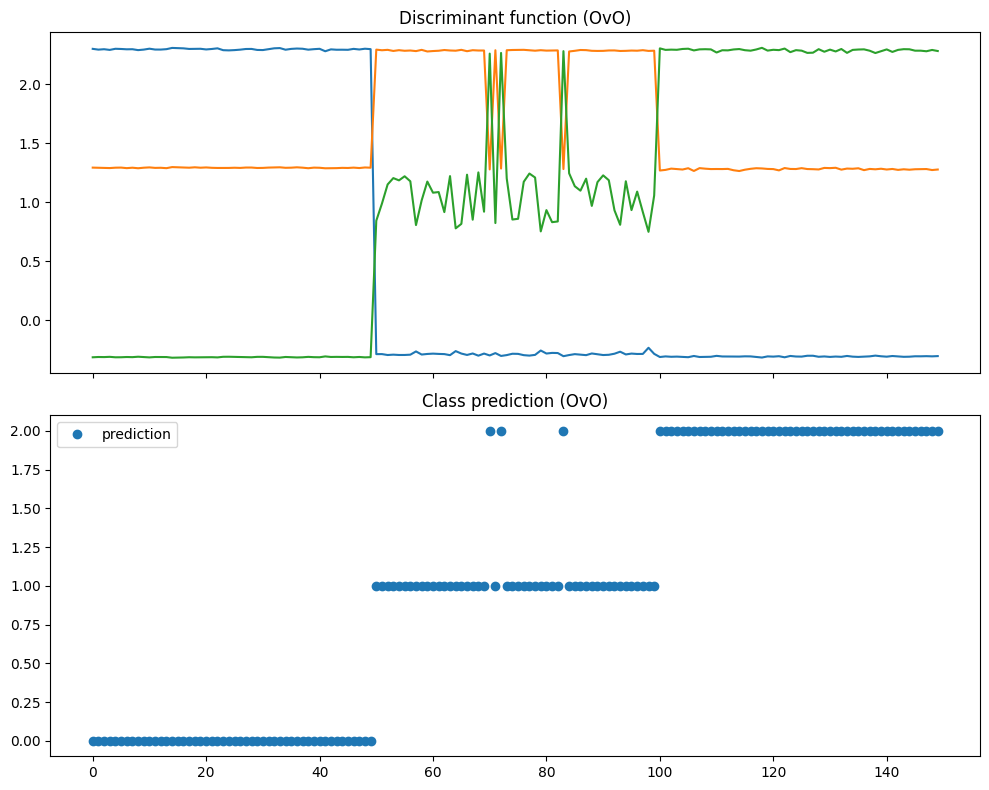

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# iris 데이터 전체를 사용
X_iris = iris.data
y_iris = iris.target

# LogisticRegression 모델을 OvO 방식으로 확장
model_ovo = OneVsOneClassifier(LogisticRegression(solver='liblinear'))
model_ovo.fit(X_iris, y_iris)

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# decision_function 값 시각화
pd.DataFrame(model_ovo.decision_function(X_iris)).plot(ax=ax1, legend=False)
ax1.set_title("Discriminant function (OvO)")

# 예측 결과 시각화
pd.DataFrame(model_ovo.predict(X_iris), columns=["prediction"]).plot(marker='o', ls='', ax=ax2, legend=True)
ax2.set_title("Class prediction (OvO)")

plt.tight_layout()
plt.show()

##### 코드 해설

#### 4.2. OvR (One-vs-the-Rest)

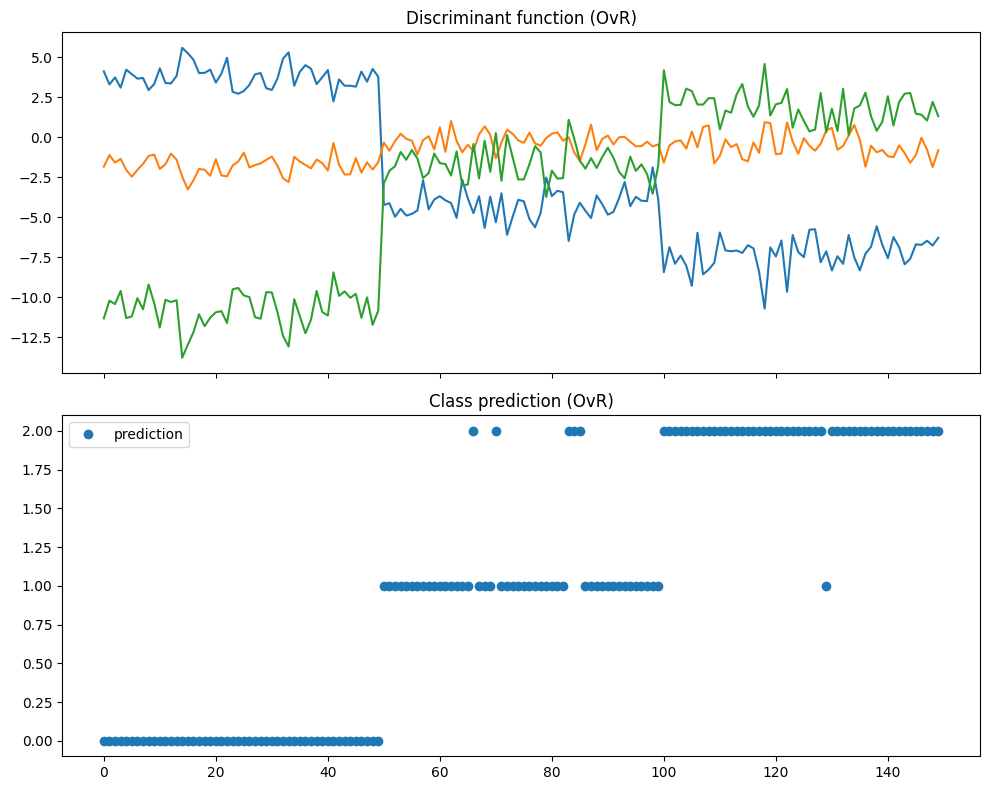

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# LogisticRegression 모델을 OvR 방식으로 확장
model_ovr = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
model_ovr.fit(X_iris, y_iris)

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# decision_function 값 시각화
pd.DataFrame(model_ovr.decision_function(X_iris)).plot(ax=ax1, legend=False)
ax1.set_title("Discriminant function (OvR)")

# 예측 결과 시각화
pd.DataFrame(model_ovr.predict(X_iris), columns=["prediction"]).plot(marker='o', ls='', ax=ax2, legend=True)
ax2.set_title("Class prediction (OvR)")

plt.tight_layout()
plt.show()

##### 코드 해설

## 핵심 요약 (Key Takeaways)

- 비즈니스 관점: `분류 분석`은 '고객이 이탈할 것인가?', '이 거래는 정상인가 사기인가?'와 같이 명확한 카테고리로 답해야 하는 비즈니스 문제를 해결하는 핵심 도구입니다. 모델의 예측 확률을 통해 우리는 비즈니스 의사결정의 확신도를 정량적으로 파악할 수 있습니다.
    
- 기술 관점 (접근 방식): 분류 모델은 크게 `확률적 모형`(확률 계산)과 `판별함수 모형`(경계선 찾기)으로 나뉩니다. 특히 확률적 모형은 다시 `생성 모형`(QDA, 나이브 베이즈)과 `판별 모형`(로지스틱 회귀, 의사결정나무)으로 세분화되며, 각각 데이터에 대한 가정과 접근 방식이 다릅니다.
    
- 기술 관점 (모델 선택): 모델 선택은 문제의 특성에 따라 달라집니다. `의사결정나무`는 결과 해석이 중요할 때, `나이브 베이즈`는 특징이 매우 많고 서로 독립적일 때(e.g., 텍스트), `커널 SVM`은 데이터의 경계가 복잡한 비선형일 때 강력한 성능을 발휘합니다.